In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
pd.set_option('display.max_columns', 30)
data = pd.read_csv('../../data/train.csv', dtype = types)

data['precio'] = data['precio']/1000

df = data.drop(columns=['id','titulo','descripcion','direccion','idzona','lat','lng','fecha'])
df.head()

,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,Apartamento,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,False,False,False,False,False,2273.0
1,Casa en condominio,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,False,False,False,True,True,3600.0
2,Casa,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,False,False,False,False,False,1200.0
3,Casa,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,False,False,False,True,True,650.0
4,Apartamento,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,False,False,False,False,False,1150.0


In [3]:
def definir_tipo(x):
    tipos_apartamento = ['Apartamento', 'Departamento Compartido']
    if x in ['Casa en condominio', 'Casa', 'Casa uso de suelo', 'Quinta Vacacional']:
        return 'Casa'
    elif x in ['Apartamento', 'Departamento Compartido']:
        return 'Apartamento'
    return 'Otro'

tipos = df
tipos['tipodepropiedad'] = tipos['tipodepropiedad'].apply(definir_tipo)
tipos.head()

,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,Apartamento,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,False,False,False,False,False,2273.0
1,Casa,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,False,False,False,True,True,3600.0
2,Casa,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,False,False,False,False,False,1200.0
3,Casa,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,False,False,False,True,True,650.0
4,Apartamento,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,False,False,False,False,False,1150.0


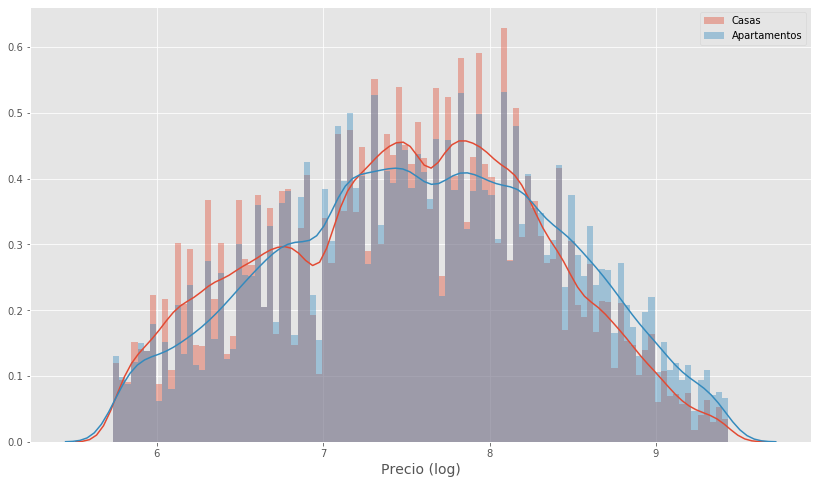

In [4]:
plt.figure(figsize=(14, 8))

casas = tipos.loc[tipos.tipodepropiedad == 'Casa']
apartamentos = tipos.loc[tipos.tipodepropiedad == 'Apartamento']
otros = tipos.loc[tipos.tipodepropiedad == 'Otro']

sns.distplot(np.log(casas['precio']), bins = 100, label = 'Casas' )
sns.distplot(np.log(apartamentos['precio']), bins = 100, label = 'Apartamentos')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()

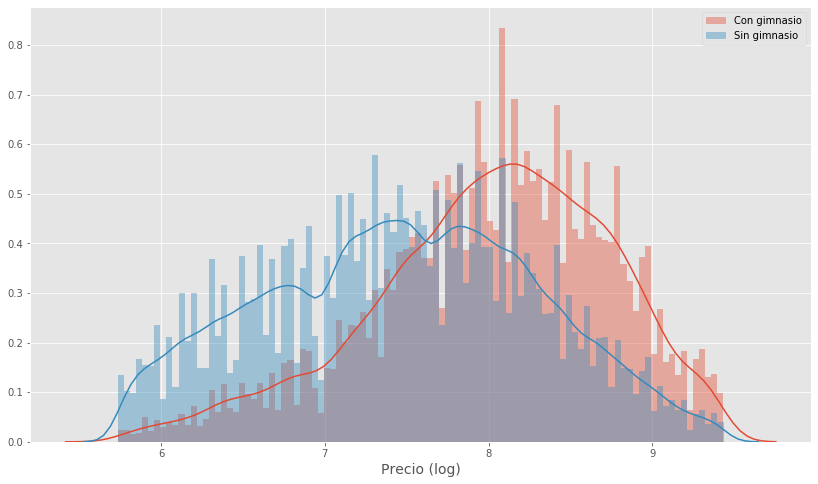

In [5]:
plt.figure(figsize=(14, 8))

con_gimnasio = tipos.loc[tipos.gimnasio == True]
sin_gimnasio = tipos.loc[tipos.gimnasio == False]

sns.distplot(np.log(con_gimnasio['precio']), bins = 100, label = 'Con gimnasio' )
sns.distplot(np.log(sin_gimnasio['precio']), bins = 100, label = 'Sin gimnasio')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()

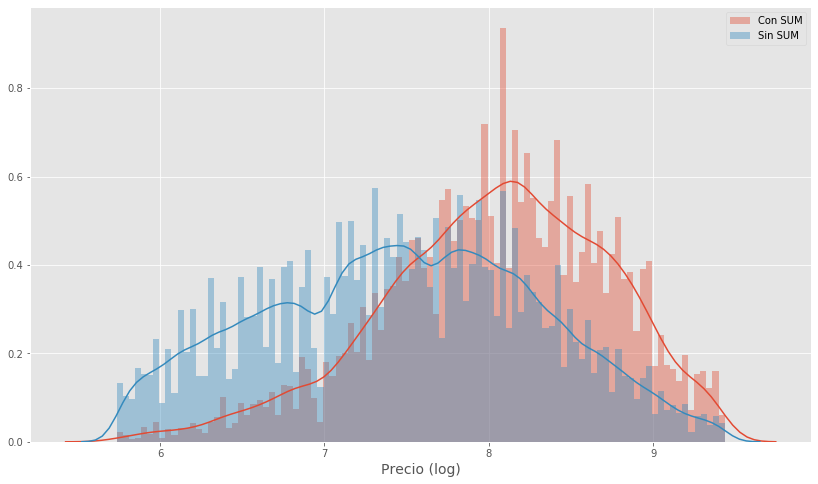

In [6]:
plt.figure(figsize=(14, 8))

con_sum = tipos.loc[tipos.usosmultiples == True]
sin_sum = tipos.loc[tipos.usosmultiples == False]

sns.distplot(np.log(con_sum['precio']), bins = 100, label = 'Con SUM' )
sns.distplot(np.log(sin_sum['precio']), bins = 100, label = 'Sin SUM')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()

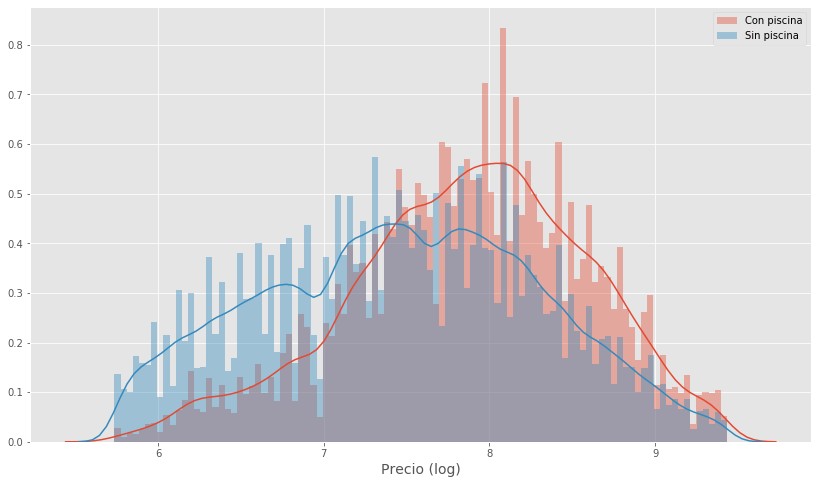

In [7]:
plt.figure(figsize=(14, 8))

con_piscina = tipos.loc[tipos.piscina == True]
sin_piscina = tipos.loc[tipos.piscina == False]

sns.distplot(np.log(con_piscina['precio']), bins = 100, label = 'Con piscina' )
sns.distplot(np.log(sin_piscina['precio']), bins = 100, label = 'Sin piscina')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()

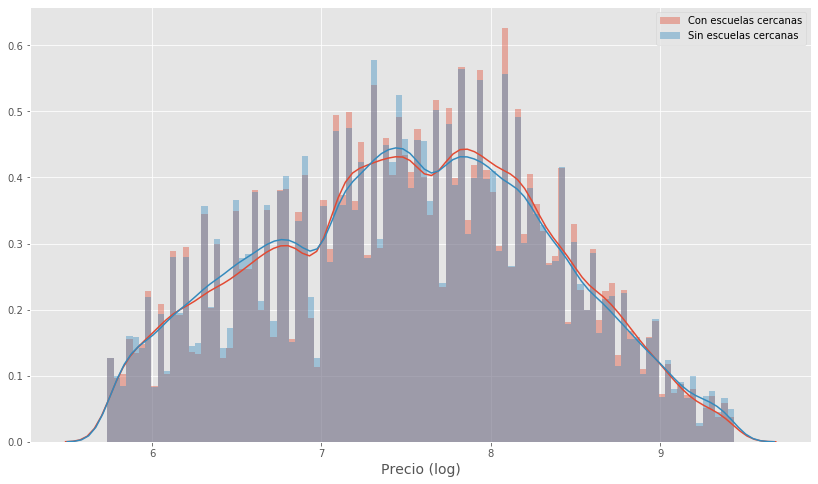

In [8]:
plt.figure(figsize=(14, 8))

con_escuelascercanas = tipos.loc[tipos.escuelascercanas == True]
sin_escuelascercanas = tipos.loc[tipos.escuelascercanas == False]

sns.distplot(np.log(con_escuelascercanas['precio']), bins = 100, label = 'Con escuelas cercanas' )
sns.distplot(np.log(sin_escuelascercanas['precio']), bins = 100, label = 'Sin escuelas cercanas')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()

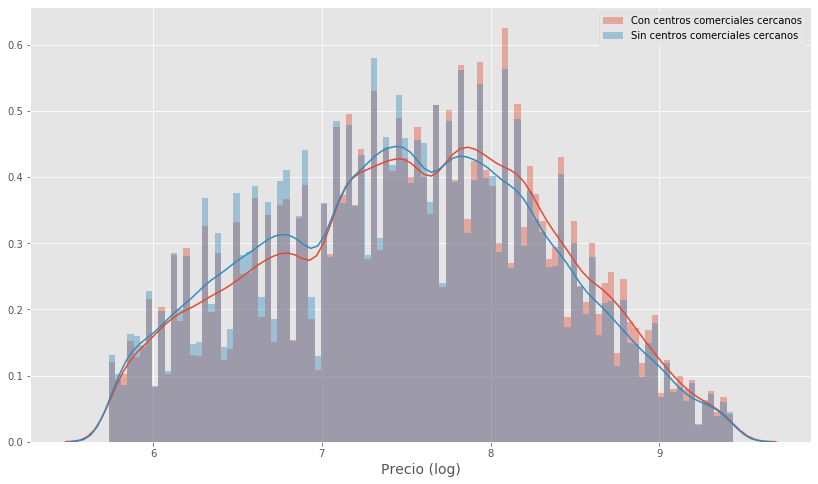

In [9]:
plt.figure(figsize=(14, 8))

con_centroscomercialescercanos = tipos.loc[tipos.centroscomercialescercanos == True]
sin_centroscomercialescercanos = tipos.loc[tipos.centroscomercialescercanos == False]

sns.distplot(np.log(con_centroscomercialescercanos['precio']), bins = 100, label = 'Con centros comerciales cercanos' )
sns.distplot(np.log(sin_centroscomercialescercanos['precio']), bins = 100, label = 'Sin centros comerciales cercanos')
plt.xlabel('Precio (log)', fontsize = 14)
plt.legend()

In [19]:
preciom2 = df
preciom2['preciom2'] = preciom2['precio']/preciom2['metroscubiertos']
preciom2['tipodepropiedad'] = preciom2['tipodepropiedad'].apply(definir_tipo)
preciom2.dropna(inplace=True)

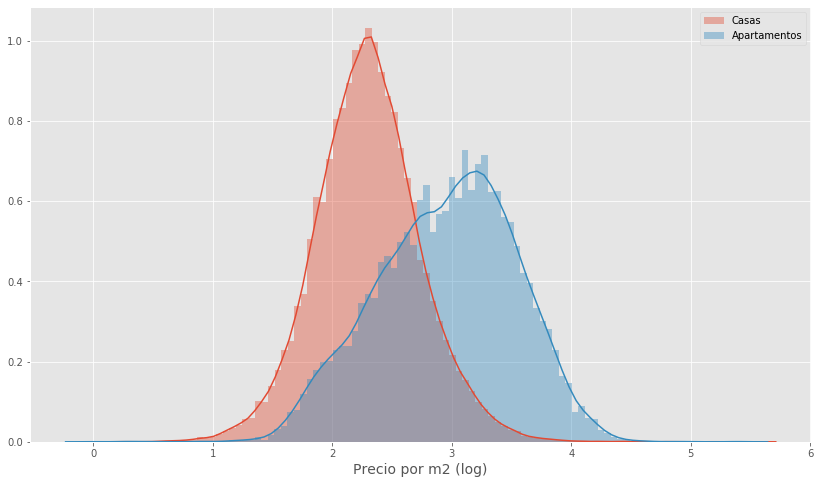

In [23]:
plt.figure(figsize=(14, 8))

casas_preciom2 = preciom2.loc[preciom2.tipodepropiedad == 'Casa']
apartamentos_preciom2 = preciom2.loc[preciom2.tipodepropiedad == 'Apartamento']

sns.distplot(np.log(casas_preciom2['preciom2']), bins = 100, label = 'Casas' )
sns.distplot(np.log(apartamentos_preciom2['preciom2']), bins = 100, label = 'Apartamentos' )

plt.xlabel('Precio por m2 (log)', fontsize = 14)
plt.legend()